In [711]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [712]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [713]:
df = pd.read_csv("C:/Users/annem/Desktop/Data Mining/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [714]:
print(df.shape)

(614, 13)


In [715]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [716]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [717]:
countNull = len(df[df.Gender.isnull()])                
print("Gender Missing values percentage : {:.2f}%".format((countNull / (len(df.Gender))*100)))

countNull = len(df[df.Married.isnull()])
print("Married Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))
                
countNull1 = len(df[df.Dependents.isnull()])
print("Dependents Missing values percentage: {:.2f}%".format((countNull / (len(df.Dependents))*100)))
                
countNull2 = len(df[df.Self_Employed.isnull()])
print("Self_Employed Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))
                
countNull3 = len(df[df.LoanAmount.isnull()])
print("LoanAmount Missing values percentage: {:.2f}%".format((countNull / (len(df.LoanAmount))*100)))
                
countNull4 = len(df[df.Loan_Amount_Term.isnull()])
print("Loan_Amount_Term Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))
                
countNull5 = len(df[df.Credit_History.isnull()])
print("Credit_History Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Gender Missing values percentage : 2.12%
Married Missing values percentage: 0.49%
Dependents Missing values percentage: 0.49%
Self_Employed Missing values percentage: 0.49%
LoanAmount Missing values percentage: 0.49%
Loan_Amount_Term Missing values percentage: 0.49%
Credit_History Missing values percentage: 0.49%


In [718]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


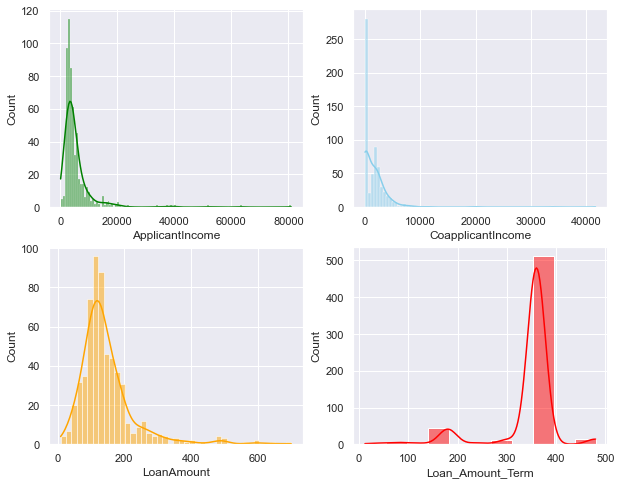

In [719]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red');

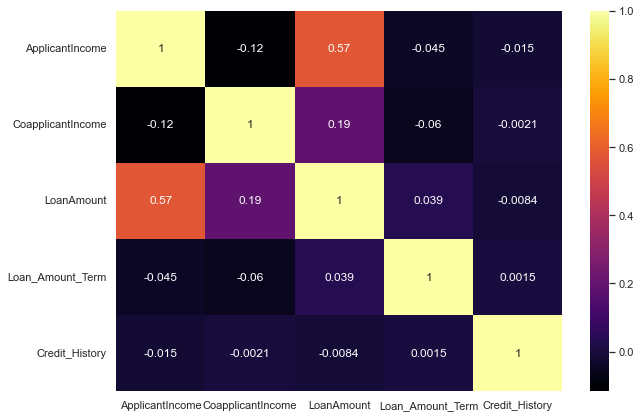

In [720]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

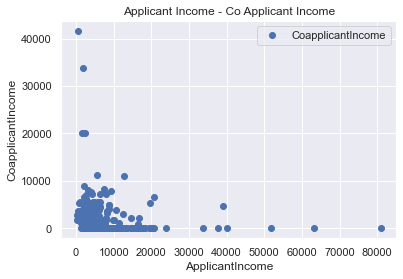

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


In [721]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

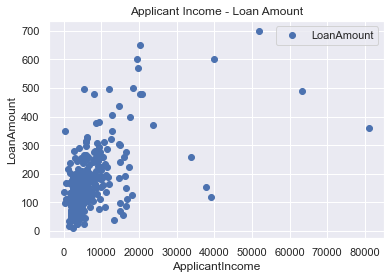

Pearson correlation: 0.5709090389885667
T Test and P value: 
 Ttest_indResult(statistic=nan, pvalue=nan)


In [722]:
df.plot(x='ApplicantIncome', y='LoanAmount', style='o')  
plt.title('Applicant Income - Loan Amount')  
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['LoanAmount']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['LoanAmount']))

In [723]:
print(df['Gender'].value_counts())
print(df['Dependents'].value_counts())
print(df['Education'].value_counts())
print(df['Married'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Loan_Amount_Term'].value_counts())
print(df['Credit_History'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [724]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [725]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [726]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [727]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [728]:
df = df.drop(['Loan_ID'], axis = 1)

In [729]:
 df = pd.get_dummies(df)

 #Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
             'Self_Employed_No', 'Loan_Status_N'], axis = 1)

 #Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
  'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
  'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [730]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


In [731]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [732]:
import numpy
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

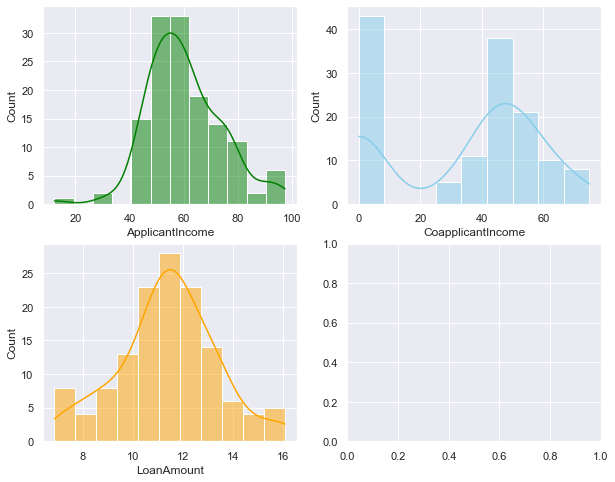

In [733]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [734]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [629]:
X, y = SMOTE().fit_resample(X, y)

# Logistic Regression

In [735]:
#Importing necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

#Generating Matrix of Features
df_inputs = pd.get_dummies(df[['Gender', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural' , 'Property_Area_Semiurban' , 'Property_Area_Urban']])
df_label = df['Loan_Status']

#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_inputs, df_label, 
                stratify=df_label, test_size=0.3, random_state=0)

# scaling to remove potential outliers
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)                     
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)      

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear',  random_state=7, max_iter=300)
lg.fit(X_train, Y_train)

# obtain the model intercept and coefficient of each input attribute
print(f"intercept: {np.round(lg.intercept_,4)}")
fieldList = np.array(list(df_inputs)).reshape(-1,1)
coeffs = np.reshape(np.round(lg.coef_,2),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
print(pd.DataFrame(coeffs,columns=['Attribute','Coefficient']))

# fit the model to compare predicted and actual target output values
y_predict1 = lg.predict(X_test)      

# assess the model permance
from sklearn import metrics 
print("Model Accuracy     : ", round(metrics.accuracy_score(Y_test, y_predict1),4))



# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(y_test, y_predict1) 
sens = metrics.recall_score(y_test, y_predict1,average='binary', pos_label=1) 
spec = metrics.recall_score(y_test, y_predict1,average='binary', pos_label=0) 
prec = metrics.precision_score(y_test, y_predict1,average='binary', pos_label=1) 
f1 = metrics.f1_score(y_test, y_predict1,average='binary', pos_label=1) 


# display all the measures derived
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3)) 

intercept: [1.569]
                  Attribute Coefficient
0                    Gender         0.0
1                   Married        0.43
2              Dependents_0         0.0
3              Dependents_1         0.0
4              Dependents_2         0.0
5             Dependents_3+         0.0
6                 Education         0.0
7             Self_Employed         0.0
8           ApplicantIncome       -0.11
9         CoapplicantIncome        0.25
10               LoanAmount       -0.39
11         Loan_Amount_Term         0.0
12           Credit_History         0.0
13      Property_Area_Rural        0.09
14  Property_Area_Semiurban        0.07
15      Property_Area_Urban       -0.16
Model Accuracy     :  0.8049
Accuracy :  0.805
Misclassification :  0.195
Precision :  0.825
Sensitivity/Recall 1:  0.971
Specificity/Recall 0:  0.0
F1-measure :  0.892


In [736]:

# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(y_test, y_predict1) 
sens = metrics.recall_score(y_test, y_predict1,average='binary', pos_label=1) 
spec = metrics.recall_score(y_test, y_predict1,average='binary', pos_label=0) 
prec = metrics.precision_score(y_test, y_predict1,average='binary', pos_label=1) 
f1 = metrics.f1_score(y_test, y_predict1,average='binary', pos_label=1) 


# display all the measures derived
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3)) 

Accuracy :  0.805
Misclassification :  0.195
Precision :  0.825
Sensitivity/Recall 1:  0.971
Specificity/Recall 0:  0.0
F1-measure :  0.892


# Decision Tree Classifier

Model Accuracy     :  0.8292682926829268
Accuracy :  0.683
Misclassification :  0.317
Precision :  0.818
Sensitivity/Recall 1:  0.794
Specificity/Recall 0:  0.143
F1-measure :  0.806


<Figure size 432x288 with 0 Axes>

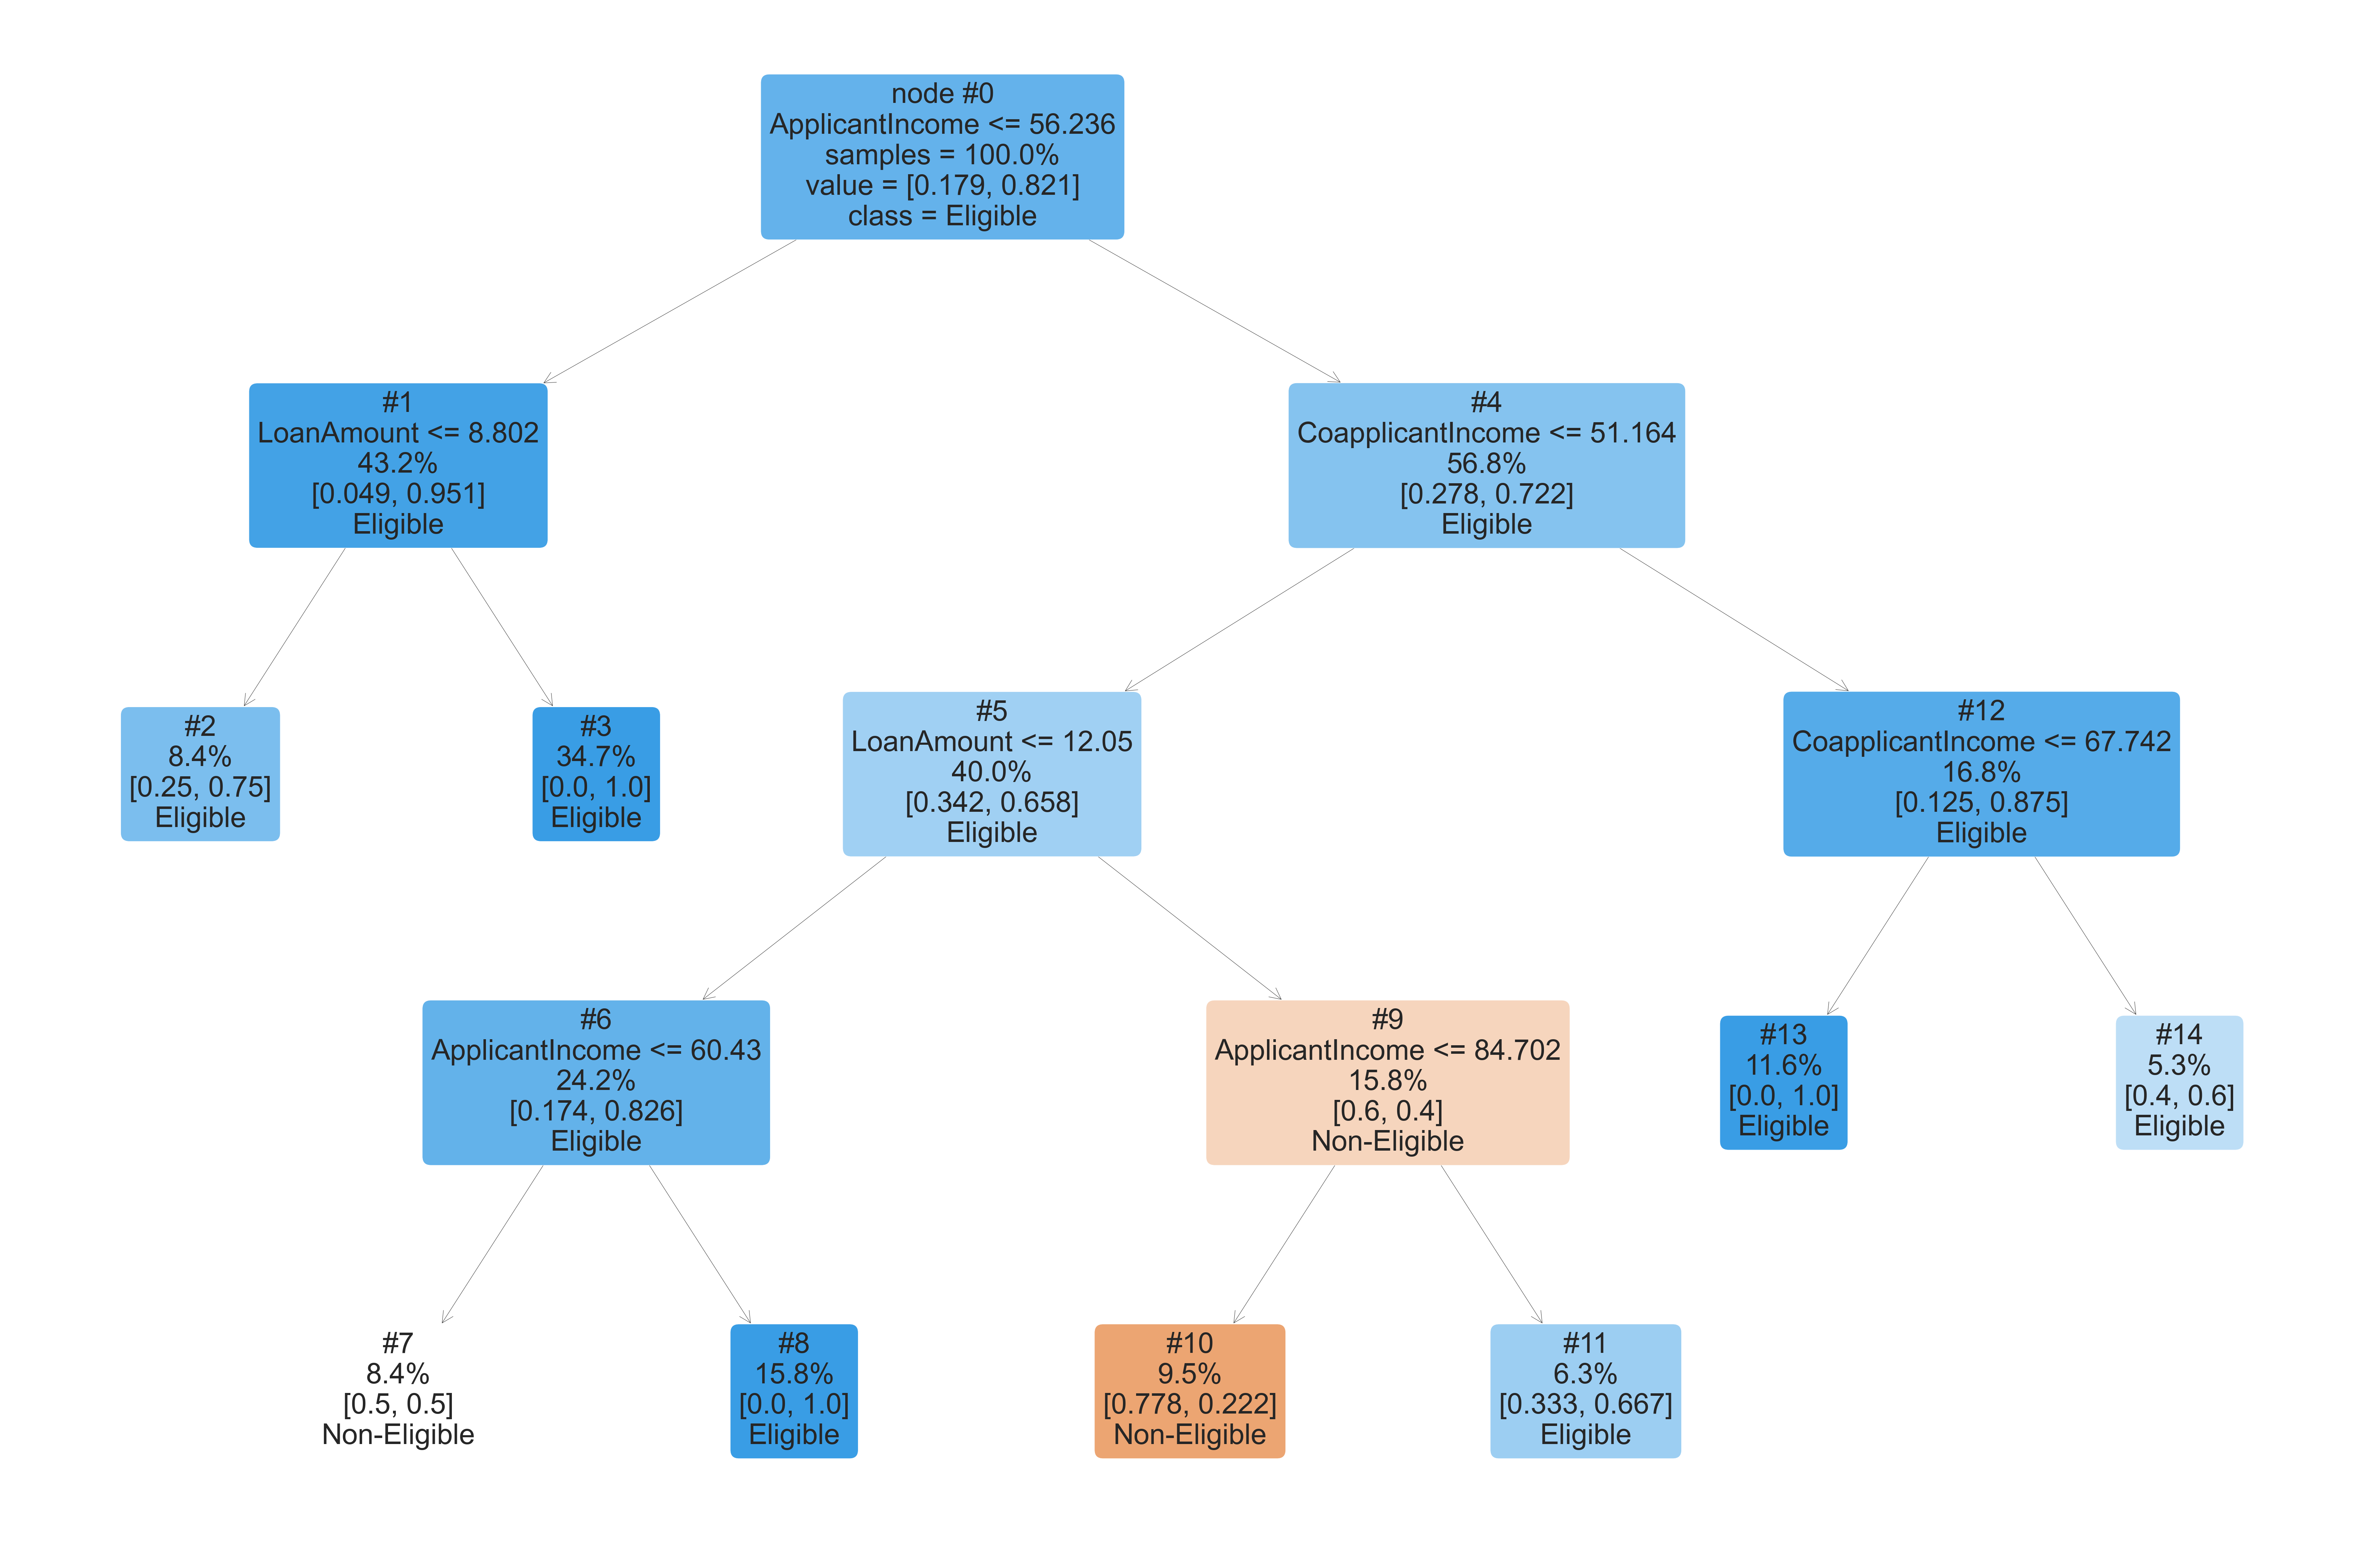

In [737]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


df_inputs = pd.get_dummies(df[['Gender', 'Married', 'Dependents_0', 'Loan_Amount_Term', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area_Rural' , 'Property_Area_Semiurban' , 'Property_Area_Urban']])
df_label= df['Loan_Status']


X_train, X_test, Y_train, Y_test = train_test_split(df_inputs, df_label, 
             stratify=df_label, test_size=0.3, random_state=0) 

min_sample = int(len(df) * 0.1) 
dtree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", max_depth=5, 
            min_samples_leaf=5, min_samples_split=min_sample, random_state=42) 
dtree.fit(X_train, Y_train)

#Predict the response for test dataset
y_predict2 = dtree.predict(X_test)
print("Model Accuracy     : ", metrics.accuracy_score(Y_test, y_predict))

#plot tree
target = list(df['Loan_Status'].unique())
feature_names = list(df_inputs.columns)
from sklearn import tree
from matplotlib import pyplot as plt
import os
plt.clf()
strFile = "plot_dtree.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
fig = plt.figure(figsize=(120,80))
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names={1:'Eligible', 0:'Non-Eligible'}, filled=True,
        label='root', node_ids=True, proportion=True,rounded=True, impurity=False)#, fontsize=20) 
fig.savefig(strFile)



# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(y_test, y_predict) 
sens = metrics.recall_score(y_test, y_predict,average='binary', pos_label=1) 
spec = metrics.recall_score(y_test, y_predict,average='binary', pos_label=0) 
prec = metrics.precision_score(y_test, y_predict,average='binary', pos_label=1) 
f1 = metrics.f1_score(y_test, y_predict,average='binary', pos_label=1) 


# display all the measures derived
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3)) 

In [638]:
df.to_csv(r"C:\Users\annem\Desktop\Data Mining\loan3.csv")

In [671]:
# import necessary libraries
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import numpy as np 


# need to convert categorical to numeric for Python ROC and AUC calculations
df_inputs = pd.get_dummies(df[['Gender', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural' , 'Property_Area_Semiurban' , 'Property_Area_Urban']]) 
df_label = df['Loan_Status']

# initiate modelling object, and split train and test sets
dtree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", max_depth=5, 
            min_samples_leaf=5, min_samples_split=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_label, 
            stratify=df_label, test_size=0.3, random_state=1) 

# train model with decision tree algorithm  
dtree.fit(X_train, y_train) 

# apply the model to predict data
y_predict = dtree.predict(X_test)

# Using metrics' function parameters to derive performance measures
acc = metrics.accuracy_score(y_test, y_predict) 
sens = metrics.recall_score(y_test, y_predict,average='binary', pos_label=1) 
spec = metrics.recall_score(y_test, y_predict,average='binary', pos_label=0) 
prec = metrics.precision_score(y_test, y_predict,average='binary', pos_label=1) 
f1 = metrics.f1_score(y_test, y_predict,average='binary', pos_label=1) 


# display all the measures derived
print("Accuracy : ", round(acc,3)) 
print("Misclassification : ", round(1-acc,3)) 
print("Precision : ", round(prec,3)) 
print("Sensitivity/Recall 1: ", round(sens,3)) 
print("Specificity/Recall 0: ", round(spec,3)) 
print("F1-measure : ", round(f1,3)) 

Accuracy :  0.683
Misclassification :  0.317
Precision :  0.818
Sensitivity/Recall 1:  0.794
Specificity/Recall 0:  0.143
F1-measure :  0.806


AUC for DecisionTree:  0.4853
AUC for Logistic Regression:  0.4391


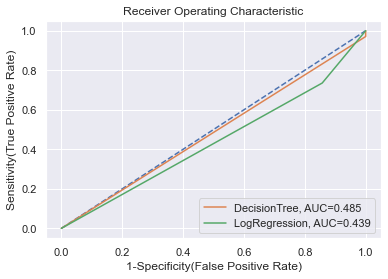

<Figure size 432x288 with 0 Axes>

In [679]:
# derive ROC AUC scores of each model
auc1 = roc_auc_score(y_test, y_predict1)
auc2 = roc_auc_score(y_test, y_predict2)
print('AUC for DecisionTree: ', round(auc1,4))
print('AUC for Logistic Regression: ', round(auc2,4))

# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit DecisionTree model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predict1)
plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(round(auc1,3)))

#fit LogisticRegression model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predict2)
plt.plot(fpr,tpr,label="LogRegression, AUC="+str(round(auc2,3)))

#add legend information
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# save to ROC chart to file
import os
strFile = "plot_roc.png"
if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig(strFile) 
plt.clf()  
